![Colegio Bourbaki](./Images/Bourbaki.png)

# Procesamiento de Lenguaje Natural

## Preprocesamiento y Vectorización de textos

### Librerias

In [1]:
pip install nltk matplotlib re pandas sklearn wordcloud

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

#Plotting
import matplotlib.pyplot as plt

#Utils
import re
import pandas as pd

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pdconte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pdconte/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/pdconte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Funciones de ayuda

In [4]:
a = 'Hola'

In [5]:
def lower_words(text):
    """ Convierte una lista de palabras en minúsculas """
    return text.lower()

In [6]:
def del_stopwords(text):
    """ Elimina las stopwords de una lista de palabras """
    stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    return stop.sub('', text)

In [7]:
def del_punct_nums(text):
  """ Elimina puntuación y números """
  return re.sub('[^a-z]+', ' ', text)

In [8]:
def stemmer(words):
    """Separa por raíz una lista de palabras """
    st = PorterStemmer()
    words = word_tokenize(words) # mismo que words.split()
    return ' '.join([st.stem(word) for word in words])

In [9]:
def lemmatizer(words):
    """ Lematiza una lista de palabras """
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(words) # mismo que words.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [10]:
def preprocessing(text):
    text = lower_words(text) # Convertir a minúsculas
    text = del_stopwords(text) # Eliminar stopwords
    text = del_punct_nums(text) # Quitar puntos y números
    text = lemmatizer(text)  # Lemmatizar    
    # if type == 'lemma':
    #     text = lemmatizer(text)  # Lemmatizar    
    # elif type == 'stem':
    #     text = stemmer(text) # Stemming
    
    text = [word for word in word_tokenize(text) if len(word) > 2] # Reconstruir el texto con palabras mayores a 2 caracteres
    return ' '.join(text)

In [11]:
def generate_wordcloud(text):
    """ Genera una nube de palabras a partir de una lista de textos """
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(text)
    
    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [12]:
# with open('./Data/docword.ny', 'r') as file:
#     # Read the entire content of the file into a string
#     book = file.read()

### Carga de Datos

Vamos a utilizar una base de datos de noticias 

In [13]:
df = pd.read_csv('./Data/labelled_newscatcher_dataset.csv', sep=';')

In [14]:
df

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en
...,...,...,...,...,...,...
108769,NATION,https://www.vanguardngr.com/2020/08/pdp-govern...,vanguardngr.com,2020-08-08 02:40:00,PDP governors’ forum urges security agencies t...,en
108770,BUSINESS,https://www.patentlyapple.com/patently-apple/2...,patentlyapple.com,2020-08-08 01:27:12,"In Q2-20, Apple Dominated the Premium Smartpho...",en
108771,HEALTH,https://www.belfastlive.co.uk/news/health/coro...,belfastlive.co.uk,2020-08-12 17:01:00,Coronavirus Northern Ireland: Full breakdown s...,en
108772,ENTERTAINMENT,https://www.thenews.com.pk/latest/696364-paul-...,thenews.com.pk,2020-08-05 04:59:00,Paul McCartney details post-Beatles distress a...,en


In [15]:
df['published_date'].min()

'2012-09-16 04:44:50'

In [16]:
df['published_date'].max()

'2020-08-18 05:49:00'

In [17]:
df['lang'].value_counts()

lang
en    108774
Name: count, dtype: int64

In [18]:
data = pd.Series(df['title'].values)

In [19]:
data

0         A closer look at water-splitting's solar fuel ...
1         An irresistible scent makes locusts swarm, stu...
2         Artificial intelligence warning: AI will know ...
3          Glaciers Could Have Sculpted Mars Valleys: Study
4         Perseid meteor shower 2020: What time and how ...
                                ...                        
108769    PDP governors’ forum urges security agencies t...
108770    In Q2-20, Apple Dominated the Premium Smartpho...
108771    Coronavirus Northern Ireland: Full breakdown s...
108772    Paul McCartney details post-Beatles distress a...
108773    Report: Talks Underway To Keep Shane Duffy In ...
Length: 108774, dtype: object

#### Transformar texto a minúsculas

In [20]:
data_altered = data.apply(lower_words)

In [21]:
data_altered

0         a closer look at water-splitting's solar fuel ...
1         an irresistible scent makes locusts swarm, stu...
2         artificial intelligence warning: ai will know ...
3          glaciers could have sculpted mars valleys: study
4         perseid meteor shower 2020: what time and how ...
                                ...                        
108769    pdp governors’ forum urges security agencies t...
108770    in q2-20, apple dominated the premium smartpho...
108771    coronavirus northern ireland: full breakdown s...
108772    paul mccartney details post-beatles distress a...
108773    report: talks underway to keep shane duffy in ...
Length: 108774, dtype: object

#### Quitar puntuación

In [22]:
data_altered = data_altered.apply(del_punct_nums)

In [23]:
data_altered[0]

'a closer look at water splitting s solar fuel potential'

#### Quitar Palabras Irrelevantes ("Stopwords")

In [24]:
data_altered = data_altered.apply(del_stopwords)

In [25]:
data_altered

0          closer look water splitting solar fuel potential
1         irresistible scent makes locusts swarm study f...
2         artificial intelligence warning ai know us bet...
3                glaciers could sculpted mars valleys study
4         perseid meteor shower time see huge bright fir...
                                ...                        
108769    pdp governors forum urges security agencies st...
108770    q apple dominated premium smartphone segment i...
108771    coronavirus northern ireland full breakdown sh...
108772    paul mccartney details post beatles distress b...
108773    report talks underway keep shane duffy premier...
Length: 108774, dtype: object

### Reducción de palabras

El proceso de reducir las palabras a su forma base o raíz se conoce como "stemming" o "lemmatización". Ambas técnicas se utilizan en procesamiento del lenguaje natural (PLN) e información textual para simplificar el análisis y la comparación de datos de texto.

Aquí hay una breve explicación de cada uno:

1. Stemming:
        Definición: El stemming implica eliminar sufijos de las palabras para obtener su forma base o raíz.
        Ejemplo: El stemming de la palabra "running" daría como resultado "run".

2. Lemmatización:
        Definición: La lematización implica reducir las palabras a su forma base o forma de diccionario (lema) teniendo en cuenta el contexto y el significado.
        Ejemplo: La lematización de la palabra "running" daría como resultado "running"

La elección entre stemming y lematización depende de su caso de uso específico y requisitos: 

* El stemming es generalmente más rápido y menos complejo, pero puede generar palabras que no son válidas. 

* La lematización, por otro lado, es más informada lingüísticamente y generalmente produce palabras válidas, pero puede ser computacionalmente más costosa.

In [26]:
data_altered_stem = data_altered.apply(stemmer)

In [27]:
data_altered_stem

0                closer look water split solar fuel potenti
1               irresist scent make locust swarm studi find
2             artifici intellig warn ai know us better know
3                     glacier could sculpt mar valley studi
4         perseid meteor shower time see huge bright fir...
                                ...                        
108769    pdp governor forum urg secur agenc strategis c...
108770    q appl domin premium smartphon segment india p...
108771    coronaviru northern ireland full breakdown sho...
108772    paul mccartney detail post beatl distress blam...
108773    report talk underway keep shane duffi premier ...
Length: 108774, dtype: object

In [28]:
data_altered_lemma = data_altered.apply(lemmatizer)

In [29]:
data_altered_lemma

0          closer look water splitting solar fuel potential
1           irresistible scent make locust swarm study find
2         artificial intelligence warning ai know u bett...
3                   glacier could sculpted mar valley study
4         perseid meteor shower time see huge bright fir...
                                ...                        
108769    pdp governor forum urge security agency strate...
108770    q apple dominated premium smartphone segment i...
108771    coronavirus northern ireland full breakdown sh...
108772    paul mccartney detail post beatles distress bl...
108773    report talk underway keep shane duffy premier ...
Length: 108774, dtype: object

### Preprocesamiento conjunto

Preprocesaremos el texto con la funcion lemmatizer en conjunto

In [30]:
data_preprocessed = data.apply(preprocessing)

In [31]:
data_preprocessed

0          closer look water splitting solar fuel potential
1           irresistible scent make locust swarm study find
2          artificial intelligence warning know better know
3                   glacier could sculpted mar valley study
4         perseid meteor shower time see huge bright fir...
                                ...                        
108769    pdp governor forum urge security agency strate...
108770    apple dominated premium smartphone segment ind...
108771    coronavirus northern ireland full breakdown sh...
108772    paul mccartney detail post beatles distress bl...
108773    report talk underway keep shane duffy premier ...
Length: 108774, dtype: object

### Visualizar palabras

In [78]:
text = " ".join(data_preprocessed.astype(str).tolist())

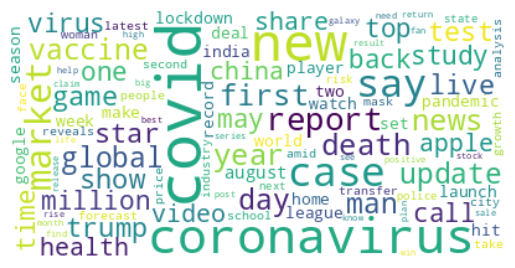

In [79]:
generate_wordcloud(text)

Podemos notar algunas palabras relevantes 'covid', 'coronavirus', 'health' relacionadas a la pandemia.

### Encajes y Vectorización de textos

**Encaje de palabras (Word Embedding)**


El encaje de palabras es una técnica en procesamiento del lenguaje natural (PLN) que asigna representaciones numéricas a las palabras de un vocabulario. 

Estas representaciones, también conocidas como vectores de palabras, capturan las relaciones semánticas y sintácticas entre las palabras. Ejemplos comunes son BoW, TF-IDF, CBOW, Word2Vec, GloVe o encajes preentrenados como FastText. 

Por lo tanto, nos permiten que las palabras similares tengan vectores cercanos en el espacio, facilitando así la captura de significados y contextos semánticos.

**Vectorización**

La vectorización en PLN se refiere al proceso de convertir texto en vectores numéricos para que los algoritmos de aprendizaje automático puedan procesarlo. 

Puede incluir encaje de palabras, pero también se refiere a técnicas más amplias, como la representación vectorial de documentos o frases.

En este notebook haremos hincapié solamente en BoW.

**Bolsa de palabras (Bag of Words - BoW)**

BoW es una técnica de vectorización que representa un documento como un conjunto desordenado de palabras y su frecuencia en ese documento. 

Cada palabra se asigna a una posición única en un vector, y el valor en esa posición indica cuántas veces aparece esa palabra en el documento. 

***BoW no captura el orden de las palabras ni las relaciones semánticas, pero es simple y efectivo para tareas básicas.***

Otra técnica es la Frecuencia del termino - Frecuencia Inversa del documento (Term Frequency-Inverse Document Frequency - TF-IDF), la cual veremos más adelante.

#### Vectorización con BoW

In [116]:
bow_vectorizer = CountVectorizer() #Pueden pasarle a la clase múltiples parámetros. Explorar en scikit-learn

In [117]:
BOW = bow_vectorizer.fit_transform(data_preprocessed)

In [118]:
BOW.shape

(108774, 46455)

In [119]:
try:
    bow_words = bow_vectorizer.get_feature_names_out()
    bow_matrix = pd.DataFrame(BOW.todense(), columns = bow_words)
except MemoryError:
    print('Insufficient memory for handling this matrix')

Insufficient memory for handling this matrix


Vamos a utilizar entonces un subconjunto de los datos para poder procesarlos.

In [120]:
subtext = data_preprocessed[0:20000]

In [121]:
subtext

0         closer look water splitting solar fuel potential
1          irresistible scent make locust swarm study find
2         artificial intelligence warning know better know
3                  glacier could sculpted mar valley study
4        perseid meteor shower time see huge bright fir...
                               ...                        
19995    vic premier urge regional travel rethink baros...
19996              reveals format two day imola grand prix
19997    britain record coronavirus death preliminary toll
19998    almost every live show taken place coronavirus...
19999    ranbir kapoor alia bhatt perfect titanic hindi...
Length: 20000, dtype: object

In [122]:
bow_vectorizer = CountVectorizer() 

In [123]:
BOW = bow_vectorizer.fit_transform(subtext)

In [124]:
BOW.shape

(20000, 17299)

In [125]:
bow_vectorizer.get_feature_names_out()

array(['aaa', 'aabar', 'aafp', ..., 'zydus', 'zynga', 'zyrus'],
      dtype=object)

In [126]:
try:
    bow_words = bow_vectorizer.get_feature_names_out()
    bow_matrix = pd.DataFrame(BOW.todense(), columns = bow_words)
except MemoryError:
    print('Insufficient memory for handling this matrix')

In [127]:
pd.DataFrame(BOW.todense(), columns = bow_words)

,aaa,aabar,aafp,aamir,aan,aapke,aapl,aaron,aaryan,aatmanirbhar,...,zte,zuiko,zulu,zune,zweli,zwift,zycov,zydus,zynga,zyrus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Realicemos el mismo procedicimiento sobre los datos crudos.

In [128]:
df['title'][0:2000]

0       A closer look at water-splitting's solar fuel ...
1       An irresistible scent makes locusts swarm, stu...
2       Artificial intelligence warning: AI will know ...
3        Glaciers Could Have Sculpted Mars Valleys: Study
4       Perseid meteor shower 2020: What time and how ...
                              ...                        
1995    Katie Mack: 'Knowing how the universe will end...
1996    Home-Set Curd: 3 Health Benefits That Will Con...
1997    Fantastical Launches New Premium Subscription ...
1998    Top 6 TikTok alternatives to go for on Android...
1999    A super speedy acid cloud has been hiding on V...
Name: title, Length: 2000, dtype: object

In [129]:
bow_vectorizer = CountVectorizer() 
BOW = bow_vectorizer.fit_transform(df['title'][0:2000].to_list())
print(BOW.shape)
bow_words = bow_vectorizer.get_feature_names_out()
bow_matrix = pd.DataFrame(BOW.todense(), columns = bow_words)
bow_matrix

(2000, 5583)


,00,000,007,01,018,040mah,05,060,080,0x800f081f,...,zen,zephyrus,zero,zombie,zombies,zones,zoom,zr1,zte,α3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ejercicios

* Explorar las clases CountVectorizer en scikit-learn para entenderla más en profundidad y conocer los parámetros que se le puede suministrar.

* Realizar el mismo procedimiento con el cuento "Pedro Páramo" de Juan Ruffo (tener en cuenta que el mismo se encuentra en español) y 'Orthodoxy' de G.Chesterton. 

![Colegio Bourbaki](./Images/Matematicas.png)

![Colegio Bourbaki](./Images/Contacto.png)